In [1]:
# Funktion der kan bruges til at installere manglende packages
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Installér fasttext
install('fasttext')

In [2]:
import fasttext

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [162]:
# Funktion til at returnére den mest optimale epoch iteration af datasættet
def model_trainer():
    models_train = []
    models_valid = []
    model_valid_epoch = 0
    model_valid_peak = 0.0

    with tqdm(total=epoch) as progress:
        print('        ', 'Training', '     | ', 'Validation')
        print('        ', 'Prec.', 'Recall  | ', 'Prec.', 'Recall')

        for i in range(epoch):
            progress.update(1)

            model = fasttext.train_supervised(input=data_train, epoch=i, lr=lr, wordNgrams=wordNgrams, bucket=bucket, dim=dim, loss=loss)
            model.save_model('fasttext_trained_model.bin')

            models_train.append(model.test(data_train, k=2))
            models_valid.append(model.test(data_valid, k=2))

            if (models_valid[i][1] > model_valid_peak):
                model_valid_peak = models_valid[i][1]
                model_valid_epoch = i+1
                precision = '\033[92mHigher\033[0m'
            else:
                precision = '\033[91mLower\033[0m'

            print('{0:2}'.format(i+1), ' ==> ', '{:.3f}'.format(models_train[i][1]), ' {:.3f}'.format(models_train[i][2]),
                  ' |', ' {:.3f}'.format(models_valid[i][1]), ' {:.3f}'.format(models_valid[i][2]), ' ==> ', precision)

        print('\n    -->  Epoch peaked at', '\033[1m' + '\033[94m' + str(model_valid_epoch))
        
        return model_valid_epoch

In [165]:
# Visualisér modellens præcision
def model_plot(title, i):
    threshold = 0.1
    y_range_min = min([y[i] for y in models_valid if y[i] > threshold])
    y_range_max = max([y[i] for y in models_train if y[i] > threshold])

    plt.plot([pr[i] for pr in models_train], label='Training')
    plt.plot([pr[i] for pr in models_valid], label='Validation')
    plt.axvline(model_valid_epoch-1, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

    plt.title('Model ('+ title+')')
    plt.ylabel(title)
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.ylim([y_range_min, y_range_max+0.01])
    return plt.show()

In [166]:
# Træn modellen ud fra givne parameter
data_train = 'test.train'
data_valid = 'test.valid'
epoch      = 30
lr         = 0.1
wordNgrams = 2
bucket     = 200000
dim        = 100
loss       = 'ova'

         Training      |  Validation
         Prec. Recall  |  Prec. Recall
 1  ==>  0.040  0.079  |  0.041  0.083  ==>  Higher
 2  ==>  0.433  0.865  |  0.424  0.848  ==>  Higher
 3  ==>  0.433  0.865  |  0.424  0.848  ==>  Lower
 4  ==>  0.438  0.876  |  0.430  0.859  ==>  Higher
 5  ==>  0.446  0.892  |  0.435  0.870  ==>  Higher
 6  ==>  0.448  0.896  |  0.438  0.877  ==>  Higher
 7  ==>  0.450  0.901  |  0.441  0.882  ==>  Higher
 8  ==>  0.452  0.904  |  0.443  0.887  ==>  Higher
 9  ==>  0.453  0.906  |  0.445  0.890  ==>  Higher
10  ==>  0.453  0.906  |  0.447  0.894  ==>  Higher
11  ==>  0.453  0.907  |  0.447  0.894  ==>  Lower
12  ==>  0.454  0.908  |  0.449  0.898  ==>  Higher
13  ==>  0.454  0.908  |  0.449  0.898  ==>  Lower
14  ==>  0.454  0.907  |  0.450  0.900  ==>  Higher
15  ==>  0.453  0.907  |  0.450  0.900  ==>  Higher
16  ==>  0.455  0.910  |  0.452  0.903  ==>  Higher
17  ==>  0.455  0.911  |  0.452  0.904  ==>  Higher
18  ==>  0.458  0.916  |  0.453  0.906  ==>

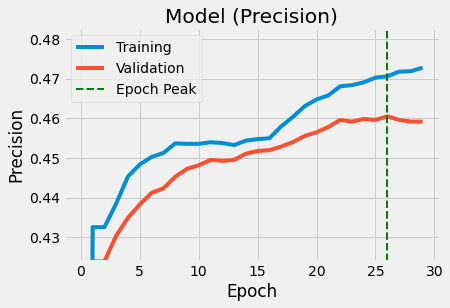

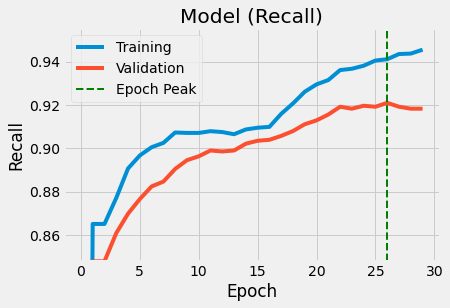

In [167]:
model_trainer()
model_plot('Precision', 1)
model_plot('Recall', 2)